## Import libraries and create the necessary dataset

In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
#from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)# dividing the dataset into train and test.



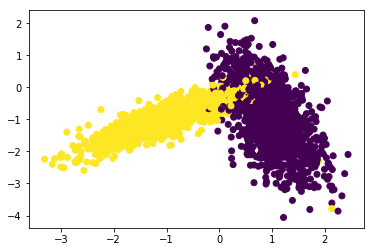

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [43]:
from sklearn.metrics import accuracy_score


def randomized_search_cv_custom(x_train, y_train, classifier, param_range, folds):
   
    random_values_for_param_range = sorted(random.sample(range(1,param_range), 10))
    print("K values considered",random_values_for_param_range)

    train_scores = []
    test_scores = []

    classifier_params = { 'n_neighbors': random_values_for_param_range }
   

    for k in classifier_params['n_neighbors']:
        
        trainscores_folds = []
        testscores_folds = []

        for fold in range(0, folds):
           
            elements_in_each_fold = int(len(x_train) / folds)

           
            test_indices = list(set(list(range((elements_in_each_fold * fold), (elements_in_each_fold*(fold+1))))))
          

            # And the rest of the indices of the dataset will be the train_indices
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices) )
            

            # after we have above, now select datapoints based on test_indices and train_indices
            x_train_fold = x_train[train_indices]
            y_train_fold = y_train[train_indices]
            x_test_fold = x_train[test_indices]
            y_test_fold = y_train[test_indices]

            
            classifier.n_neighbors = k
            classifier.fit(x_train_fold, y_train_fold)

            y_predicted = classifier.predict(x_test_fold)
            testscores_folds.append(accuracy_score(y_test_fold, y_predicted))

            # Now run prediction based on x_train_fold and append the accuracy score in the trainscores_folds
            y_predicted1 = classifier.predict(x_train_fold)
            trainscores_folds.append(accuracy_score(y_train_fold, y_predicted1))

        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
        

    return train_scores, test_scores, classifier_params

K values considered [2, 6, 8, 9, 14, 17, 19, 23, 24, 25]
trainscores are:  [0.9409333333333333, 0.9510666666666667, 0.9523999999999999, 0.9529333333333333, 0.9545333333333333, 0.9545333333333333, 0.9541333333333334, 0.9533333333333333, 0.9535999999999999, 0.9541333333333334]
testscores are:  [0.9677333333333333, 0.9611333333333333, 0.9604666666666667, 0.9608666666666666, 0.9585333333333335, 0.9575333333333335, 0.9571333333333333, 0.9571999999999999, 0.9568, 0.9575999999999999]


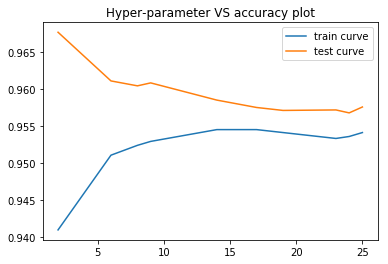

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

n_neighbour = KNeighborsClassifier()
params_range = 30
folds = 3

testscores, trainscores, params = randomized_search_cv_custom(X_train, y_train, n_neighbour, params_range, folds)

print('trainscores are: ', trainscores)
print('testscores are: ', testscores)
plt.plot(params['n_neighbors'], trainscores, label='train curve')
plt.plot(params['n_neighbors'], testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

### Observation:
#### 1. the Optimal K value for the dataset is 18

### Decision Boundary using optimal K

In [49]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

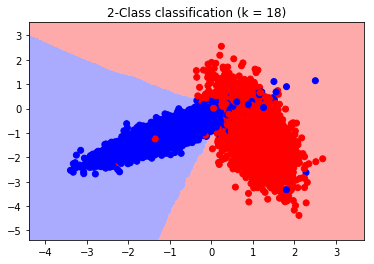

In [50]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 18)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)